IMPORT

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

PREPROCESSING DATASET

In [2]:
# read data
dataset = pd.read_csv('dataset-vertebral column.csv')

# set data & label
X = dataset.iloc[:, :-1].values # menampung data
Y = dataset.iloc[:, -1].values # menampung label

# MinMax Normalization
X = minmax_scale(X)

# One-hot Encoding
Y_encode = []
for index,i in enumerate(Y.tolist()):
  if i == 1: Y_encode.append([1,0,0])
  if i == 2: Y_encode.append([0,1,0])
  if i == 3: Y_encode.append([0,0,1])

# Split training & testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y_encode, test_size=.3)

TRAINING

In [3]:
# Sigmoid activation
def sigmoid(x):
  return 1/(1 + np.exp(-x))
sig = np.vectorize(sigmoid)

In [4]:
# Nguyen-Widraw
def nguyen_widrow(n,p):
  # n = 6 #input
  # p = 5 #hidden

  weight = np.random.uniform(low=-5, high=5, size=(p,n))
  beta = .7*(p**(1/n))
  bias = np.random.uniform(low=-beta, high=beta, size=p)
  norm_hidden = []

  for i in range(p):
    jum = 0
    for j in range(n):
      jum += weight[i][j]**2
    norm_hidden.append(jum**(1/2))
  
  for i in range(p):
    for j in range(n):
      weight[i][j] = beta * weight[i][j] / norm_hidden[i]

  return weight, bias

In [5]:
def model_fit(hidden_layer, input_layer, output_layer, x_train, y_train, epoch, nw):
  loss_values = []
  acc_values = []

  # inisialisasi bobot dan bias: hidden layer
  if nw:
    w_hidden, b_hidden = nguyen_widrow(input_layer,hidden_layer)
  else:
    # w_hidden = np.random.uniform(low=-5, high=5, size=(hidden_layer,input_layer))
    # b_hidden = np.random.uniform(low=-5, high=5, size=hidden_layer)
    w_hidden = np.random.uniform(low=-1, high=1, size=(hidden_layer,input_layer))
    b_hidden = np.random.uniform(low=-1, high=1, size=hidden_layer)

  # inisialisasi bobot dan bias: Output layer
  w_output = np.random.uniform(low=-5, high=5, size=(output_layer,hidden_layer))
  b_output = np.random.uniform(low=-5, high=5, size=output_layer)
  # w_output, b_output = nguyen_widrow(hidden_layer,output_layer)

  for i in range(epoch):
    mse = 0
    acc = 0
    for index,data in enumerate(x_train):
      # === FEEDFOWARD ===
      # ---- feedfoward: hidden layer
      o_hidden = np.matmul(w_hidden, data) + b_hidden
      o_hidden = sig(o_hidden)
      # ---- feedfoward: output layer
      o_output = np.matmul(w_output, o_hidden) + b_output
      o_output = sig(o_output)

      # === BACKPROPAGATION ===
      # ---- error: output layer
      e_output = (y_train[index]-o_output) * o_output * (1 - o_output)
      # ---- delta bobot: output layer
      deltaW_output = lr * (e_output * o_hidden[np.newaxis].T)
      # ---- delta bias: output layer
      deltaB_output = lr * e_output

      # ---- error: hidden layer
      e_hidden = (np.matmul(np.array(w_output).T.tolist(), e_output)) * o_hidden * (1 - o_hidden)
      # ---- delta bobot: hidden layer
      deltaW_hidden = lr * (e_hidden * np.array(data)[np.newaxis].T)
      # ---- delta bias: hidden layer
      deltaB_hidden = lr * e_hidden

      # ---- update bobot: output layer
      w_output = w_output + deltaW_output.transpose()
      # ---- update bias: output layer
      b_output = b_output + deltaB_output

      # ---- update bobot: hidden layer
      w_hidden = w_hidden + deltaW_hidden.transpose()
      # ---- update bias: hidden layer
      b_hidden = b_hidden + deltaB_hidden

      mse += sum((y_train[index]-o_output) ** 2)
      acc += sum(np.absolute(y_train[index]-o_output.round()))
    
    mse /= len(x_train)
    acc = 1 - (acc/len(y_train))
    if mse < 0.01: break
    else:
      loss_values.append(mse)
      acc_values.append(acc)
      # print("Epoch:",i," | loss :",mse," | accuracy :",acc)
      print("Epoch:",i," | loss :",mse)
  
  return w_hidden, b_hidden, w_output, b_output, loss_values, acc_values

TESTING

In [6]:
def predict(x_test, w_hidden, b_hidden, w_output, b_output):
  acc = 0
  o_predict = []
  o_predict2 = []
  for index,data in enumerate(x_test):
    # === FEEDFOWARD ===
    # ---- feedfoward: hidden layer
    o_hidden = sig(np.matmul(w_hidden, data) + b_hidden)
    # ---- feedfoward: output layer
    o_output = sig(np.matmul(w_output, o_hidden) + b_output)
    o_predict.append((np.round(o_output)).tolist())
    o_predict2.append(o_output)

    if y_test[index]==(np.round(o_output)).tolist(): acc+=1
  # print('predict : ',acc/len(x_test))

  return acc/len(x_test), o_predict, o_predict2

TUNING

In [7]:
# struktur ANN
input_layer = len(X[0])
hidden_layer = 5
output_layer = 3
epoch = 500 # 500
lr = .7
Nguyen_widrow = True

# training
w_hidden, b_hidden, w_output, b_output, loss_values, acc_values = model_fit(hidden_layer, input_layer, output_layer, x_train, y_train, epoch, Nguyen_widrow)

# testing
accuracy, o_predict, o_predict2 = predict(x_test, w_hidden, b_hidden, w_output, b_output)

Epoch: 0  | loss : 0.6398380229186149
Epoch: 1  | loss : 0.5490864897693623
Epoch: 2  | loss : 0.5226242404375976
Epoch: 3  | loss : 0.5080799813471569
Epoch: 4  | loss : 0.4979018230110521
Epoch: 5  | loss : 0.48986839311149344
Epoch: 6  | loss : 0.4829916262250095
Epoch: 7  | loss : 0.47649628513759507
Epoch: 8  | loss : 0.46849032281332603
Epoch: 9  | loss : 0.43644450344925423
Epoch: 10  | loss : 0.4030118208227506
Epoch: 11  | loss : 0.3912789554304599
Epoch: 12  | loss : 0.3819920220666057
Epoch: 13  | loss : 0.3742061324818637
Epoch: 14  | loss : 0.36752713029702133
Epoch: 15  | loss : 0.36168334284441866
Epoch: 16  | loss : 0.3564725488434364
Epoch: 17  | loss : 0.3517445427185466
Epoch: 18  | loss : 0.347386500036448
Epoch: 19  | loss : 0.343311903134188
Epoch: 20  | loss : 0.33945313019166484
Epoch: 21  | loss : 0.33575662041925175
Epoch: 22  | loss : 0.33217963623141444
Epoch: 23  | loss : 0.32868802984037493
Epoch: 24  | loss : 0.32525469866453083
Epoch: 25  | loss : 0.3218

Epoch: 209  | loss : 0.18837503203981626
Epoch: 210  | loss : 0.18825679894537886
Epoch: 211  | loss : 0.1881394503378679
Epoch: 212  | loss : 0.18802295870072258
Epoch: 213  | loss : 0.18790729874887577
Epoch: 214  | loss : 0.18779244736166606
Epoch: 215  | loss : 0.18767838350856658
Epoch: 216  | loss : 0.18756508816873882
Epoch: 217  | loss : 0.187452544245369
Epoch: 218  | loss : 0.18734073647568697
Epoch: 219  | loss : 0.18722965133751626
Epoch: 220  | loss : 0.18711927695314448
Epoch: 221  | loss : 0.1870096029912578
Epoch: 222  | loss : 0.1869006205676198
Epoch: 223  | loss : 0.1867923221451408
Epoch: 224  | loss : 0.18668470143391971
Epoch: 225  | loss : 0.18657775329180337
Epoch: 226  | loss : 0.18647147362596453
Epoch: 227  | loss : 0.18636585929594585
Epoch: 228  | loss : 0.18626090801858633
Epoch: 229  | loss : 0.18615661827520225
Epoch: 230  | loss : 0.18605298922135036
Epoch: 231  | loss : 0.18595002059947585
Epoch: 232  | loss : 0.1858477126546932
Epoch: 233  | loss : 0.

Epoch: 415  | loss : 0.17409101599217838
Epoch: 416  | loss : 0.174046456837804
Epoch: 417  | loss : 0.17400211765843085
Epoch: 418  | loss : 0.17395799821770885
Epoch: 419  | loss : 0.17391409818142228
Epoch: 420  | loss : 0.1738704171190204
Epoch: 421  | loss : 0.1738269545053149
Epoch: 422  | loss : 0.17378370972233667
Epoch: 423  | loss : 0.1737406820613439
Epoch: 424  | loss : 0.17369787072496629
Epoch: 425  | loss : 0.17365527482948065
Epoch: 426  | loss : 0.17361289340720465
Epoch: 427  | loss : 0.17357072540899743
Epoch: 428  | loss : 0.17352876970685865
Epoch: 429  | loss : 0.17348702509661218
Epoch: 430  | loss : 0.17344549030066714
Epoch: 431  | loss : 0.17340416397084385
Epoch: 432  | loss : 0.1733630446912523
Epoch: 433  | loss : 0.17332213098121926
Epoch: 434  | loss : 0.1732814212982458
Epoch: 435  | loss : 0.17324091404099148
Epoch: 436  | loss : 0.17320060755227312
Epoch: 437  | loss : 0.17316050012207143
Epoch: 438  | loss : 0.17312058999053248
Epoch: 439  | loss : 0.

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

print(y_test)
print(o_predict)
# cm = multilabel_confusion_matrix(y_test, o_predict)
# cma = multilabel_confusion_matrix(y_test, o_predict)
# print(cma)

temp = 0
cm = [[0,0,0],[0,0,0],[0,0,0]]
for i,y in enumerate(y_test):
  if o_predict2[i].tolist().index(max(o_predict2[i]))==0: pred=[1,0,0]
  elif o_predict2[i].tolist().index(max(o_predict2[i]))==1: pred=[0,1,0]
  elif o_predict2[i].tolist().index(max(o_predict2[i]))==2: pred=[0,0,1]

  if y_test[i]==[1,0,0] and pred==[1,0,0]: cm[0][0]+=1
  elif y_test[i]==[1,0,0] and pred==[0,1,0]: cm[0][1]+=1
  elif y_test[i]==[1,0,0] and pred==[0,0,1]: cm[0][2]+=1
  elif y_test[i]==[0,1,0] and pred==[1,0,0]: cm[1][0]+=1
  elif y_test[i]==[0,1,0] and pred==[0,1,0]: cm[1][1]+=1
  elif y_test[i]==[0,1,0] and pred==[0,0,1]: cm[1][2]+=1
  elif y_test[i]==[0,0,1] and pred==[1,0,0]: cm[2][0]+=1
  elif y_test[i]==[0,0,1] and pred==[0,1,0]: cm[2][1]+=1
  elif y_test[i]==[0,0,1] and pred==[0,0,1]: cm[2][2]+=1

print(cm)

accuracy = (cm[0][0] + cm[1][1] + cm[2][2])/ len(y_test)
precision = ((cm[0][0]/(cm[0][0] + cm[0][1] + cm[0][2])) + (cm[1][1]/(cm[1][1] + cm[1][0] + cm[1][2])) + (cm[2][2]/(cm[2][2] + cm[2][0] + cm[2][1])))/3
recall = ((cm[0][0]/(cm[0][0] + cm[1][0] + cm[2][0])) + (cm[1][1]/(cm[1][1] + cm[0][1] + cm[2][1])) + (cm[2][2]/(cm[2][2] + cm[0][2] + cm[1][2])))/3

print(accuracy*100)
print(precision*100)
print(recall*100)

[[0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1]

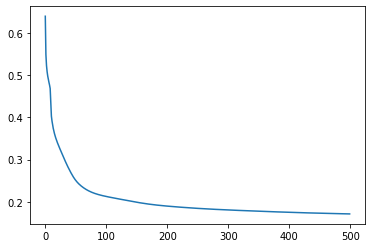

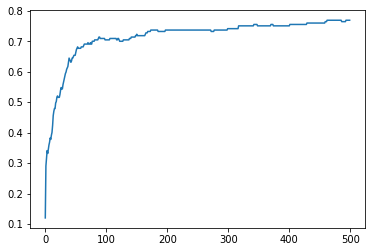

In [9]:
import matplotlib.pyplot as plt

plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

plot1 = plt.figure(1)
plt.plot(acc_values)
plt.show()